In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sb
import missingno as msno
import numpy as np
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from textblob import TextBlob

In [2]:
etihad_airways = pd.read_csv('raw_data/etihad_airways.csv')
qatar_airways = pd.read_csv('raw_data/qatar_airways.csv')
emirates = pd.read_csv('raw_data/emirates.csv')

### Visualization

In [3]:
# data distribution
def dist(df):
    # Create a figure and axis
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot histogram for 'traveller_type'
    df['traveller_type'].hist(bins=30, edgecolor='black', ax=axs[0])
    axs[0].set_title('Traveller Type Distribution')
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    # Plot histogram for 'cabin'
    df['cabin'].hist(bins=30, edgecolor='black', ax=axs[1])
    axs[1].set_title('Cabin Distribution')
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')

    df['recommended'] = df['recommended'].replace({'yes': 1, 'no': 0})

    df.hist(figsize=(10,9))

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


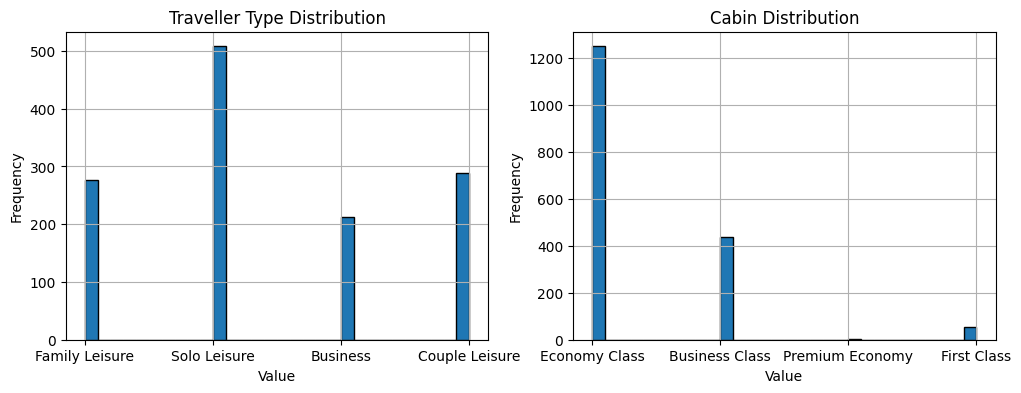

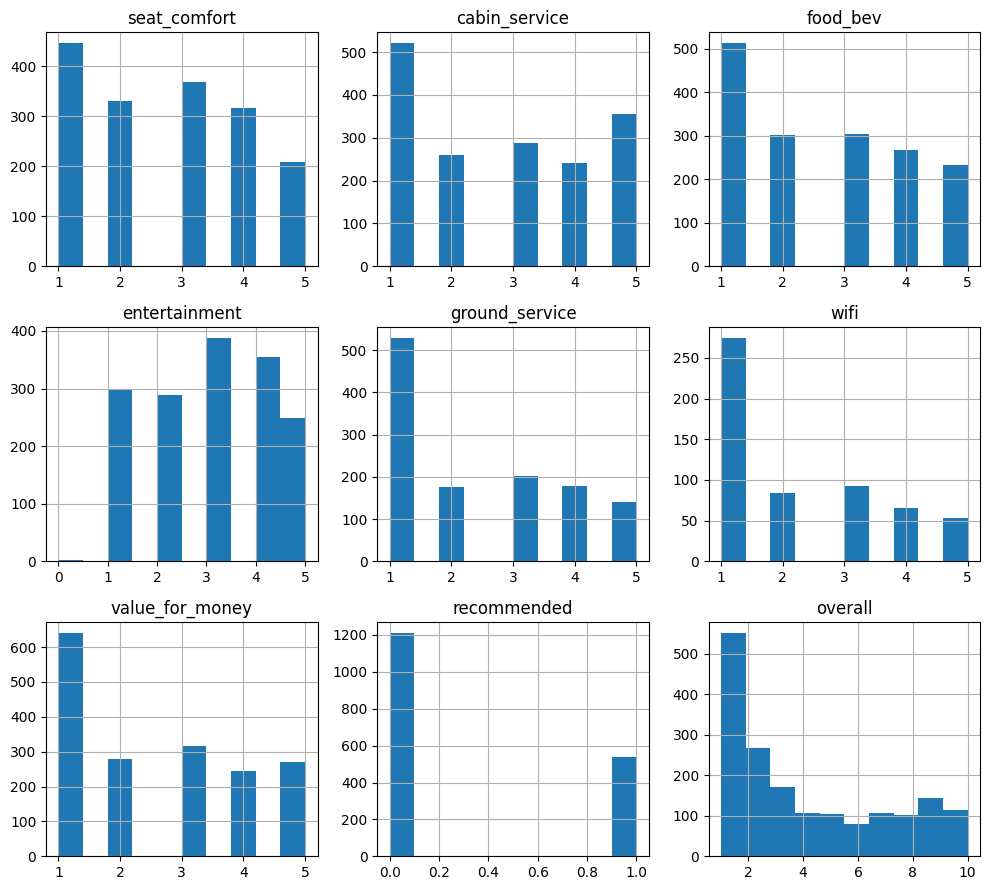

In [4]:
dist(etihad_airways)

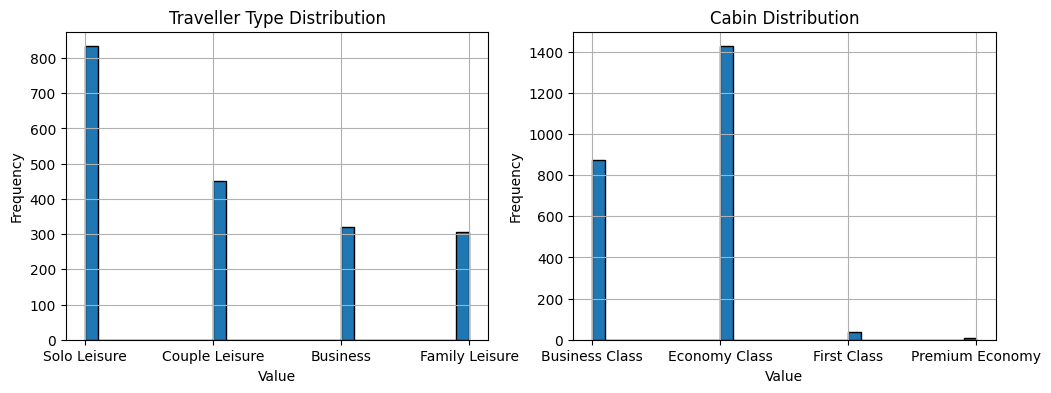

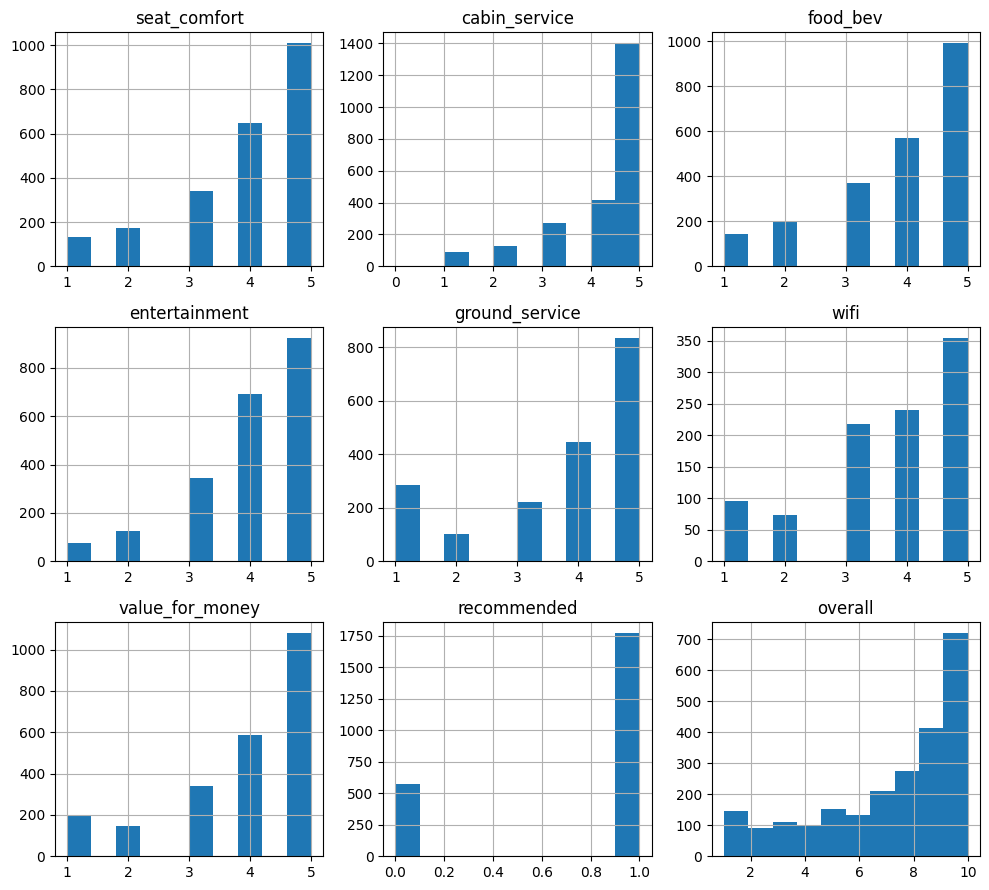

In [5]:
dist(qatar_airways)

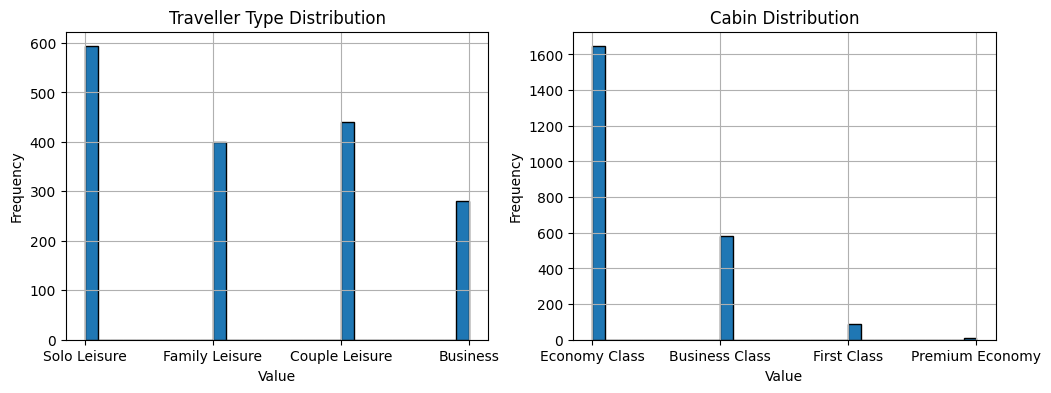

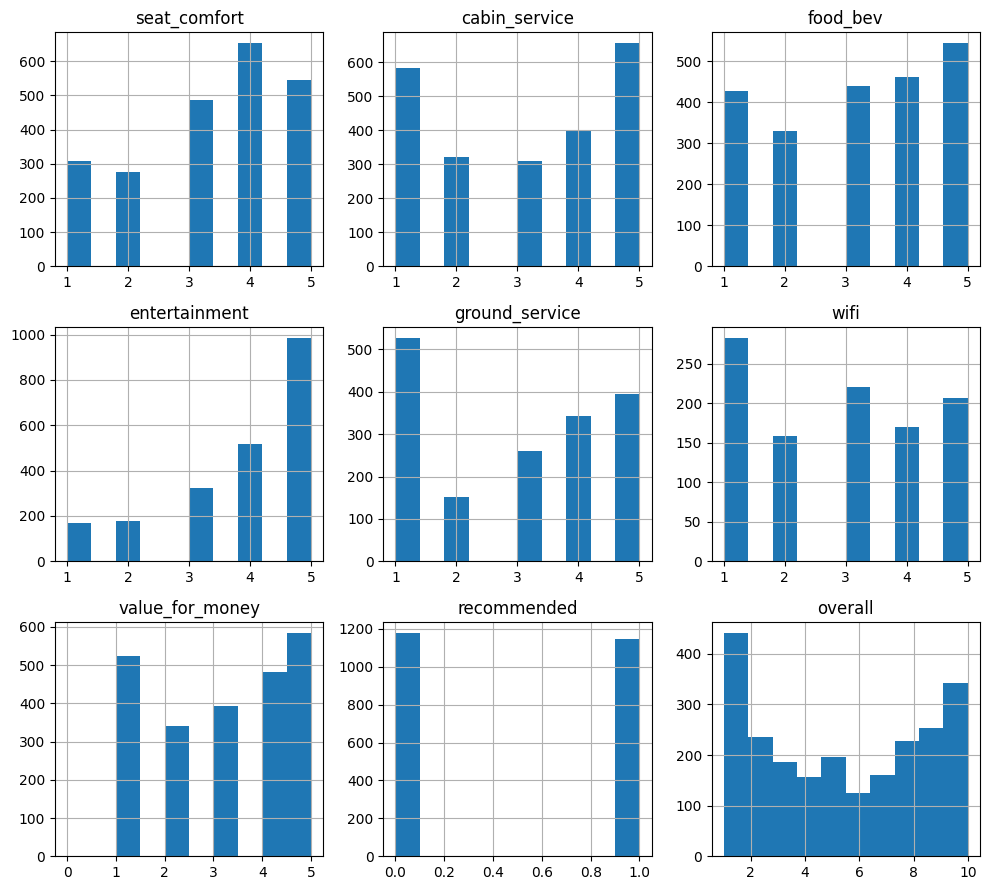

In [6]:
dist(emirates)

<AxesSubplot:>

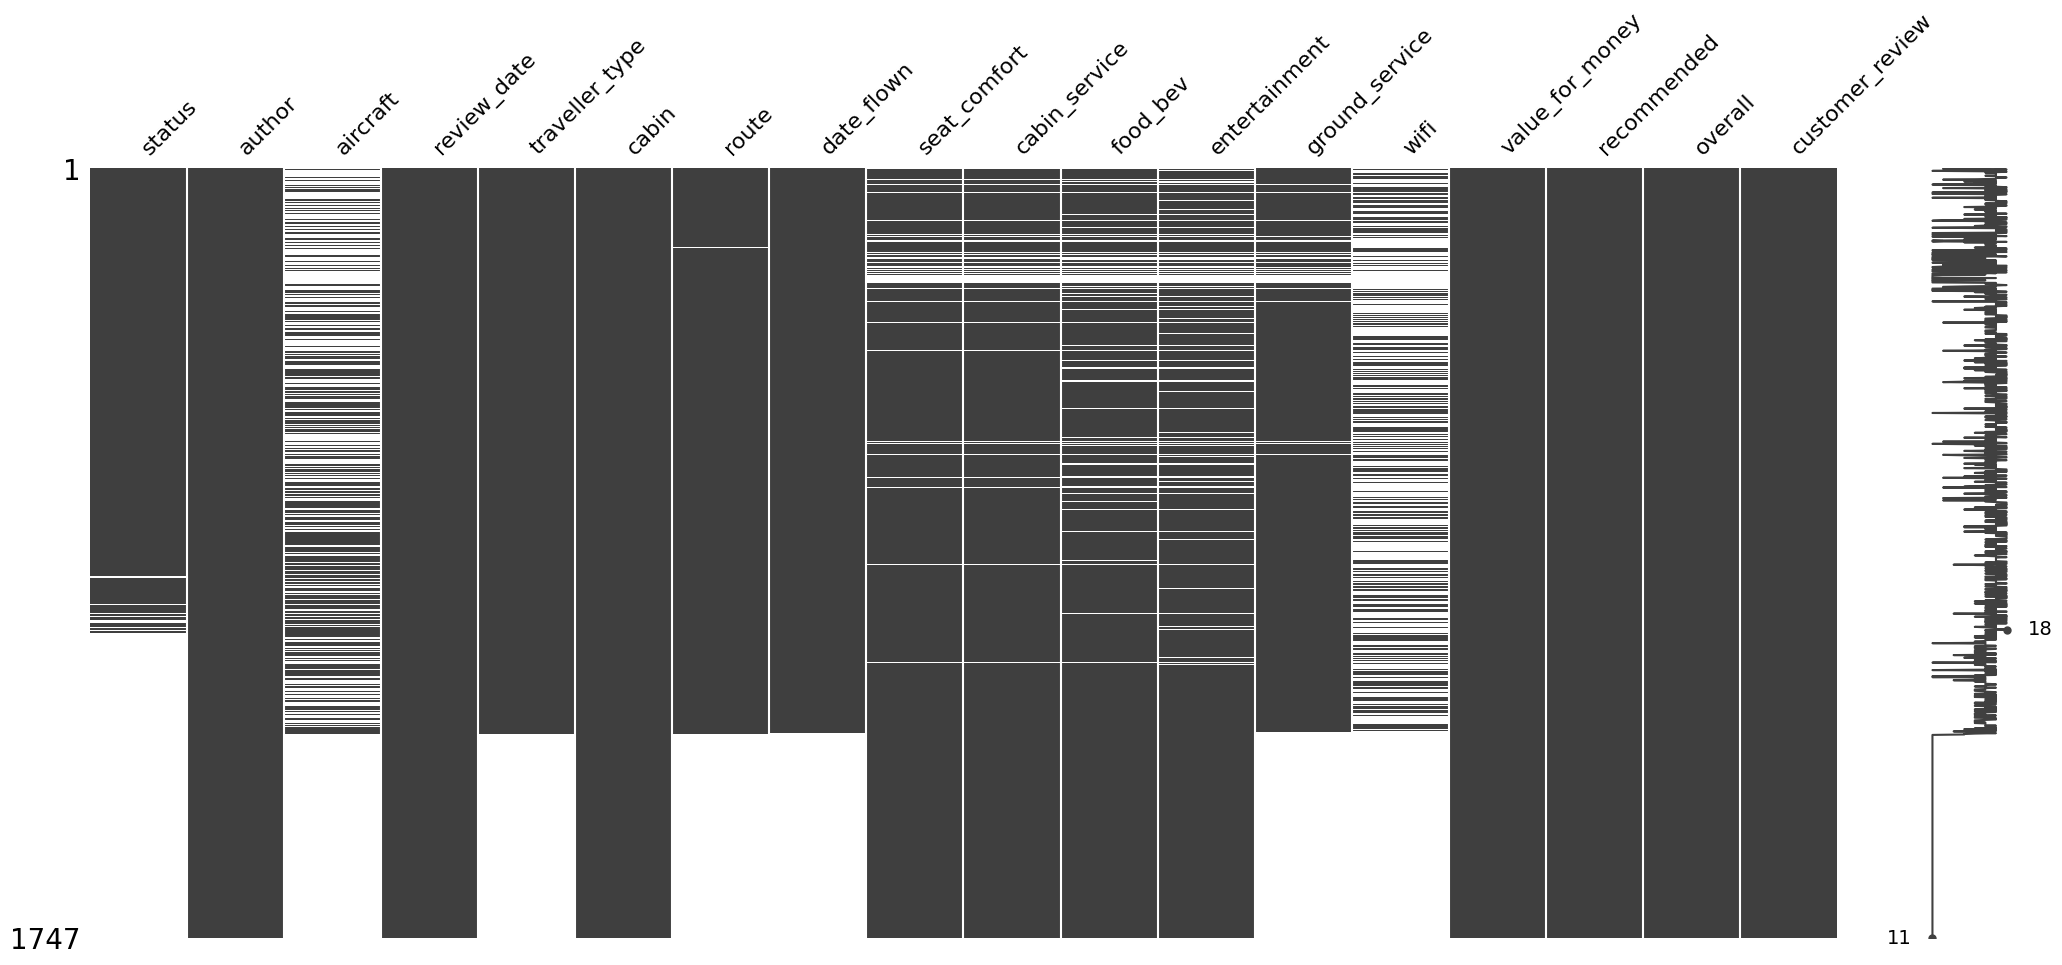

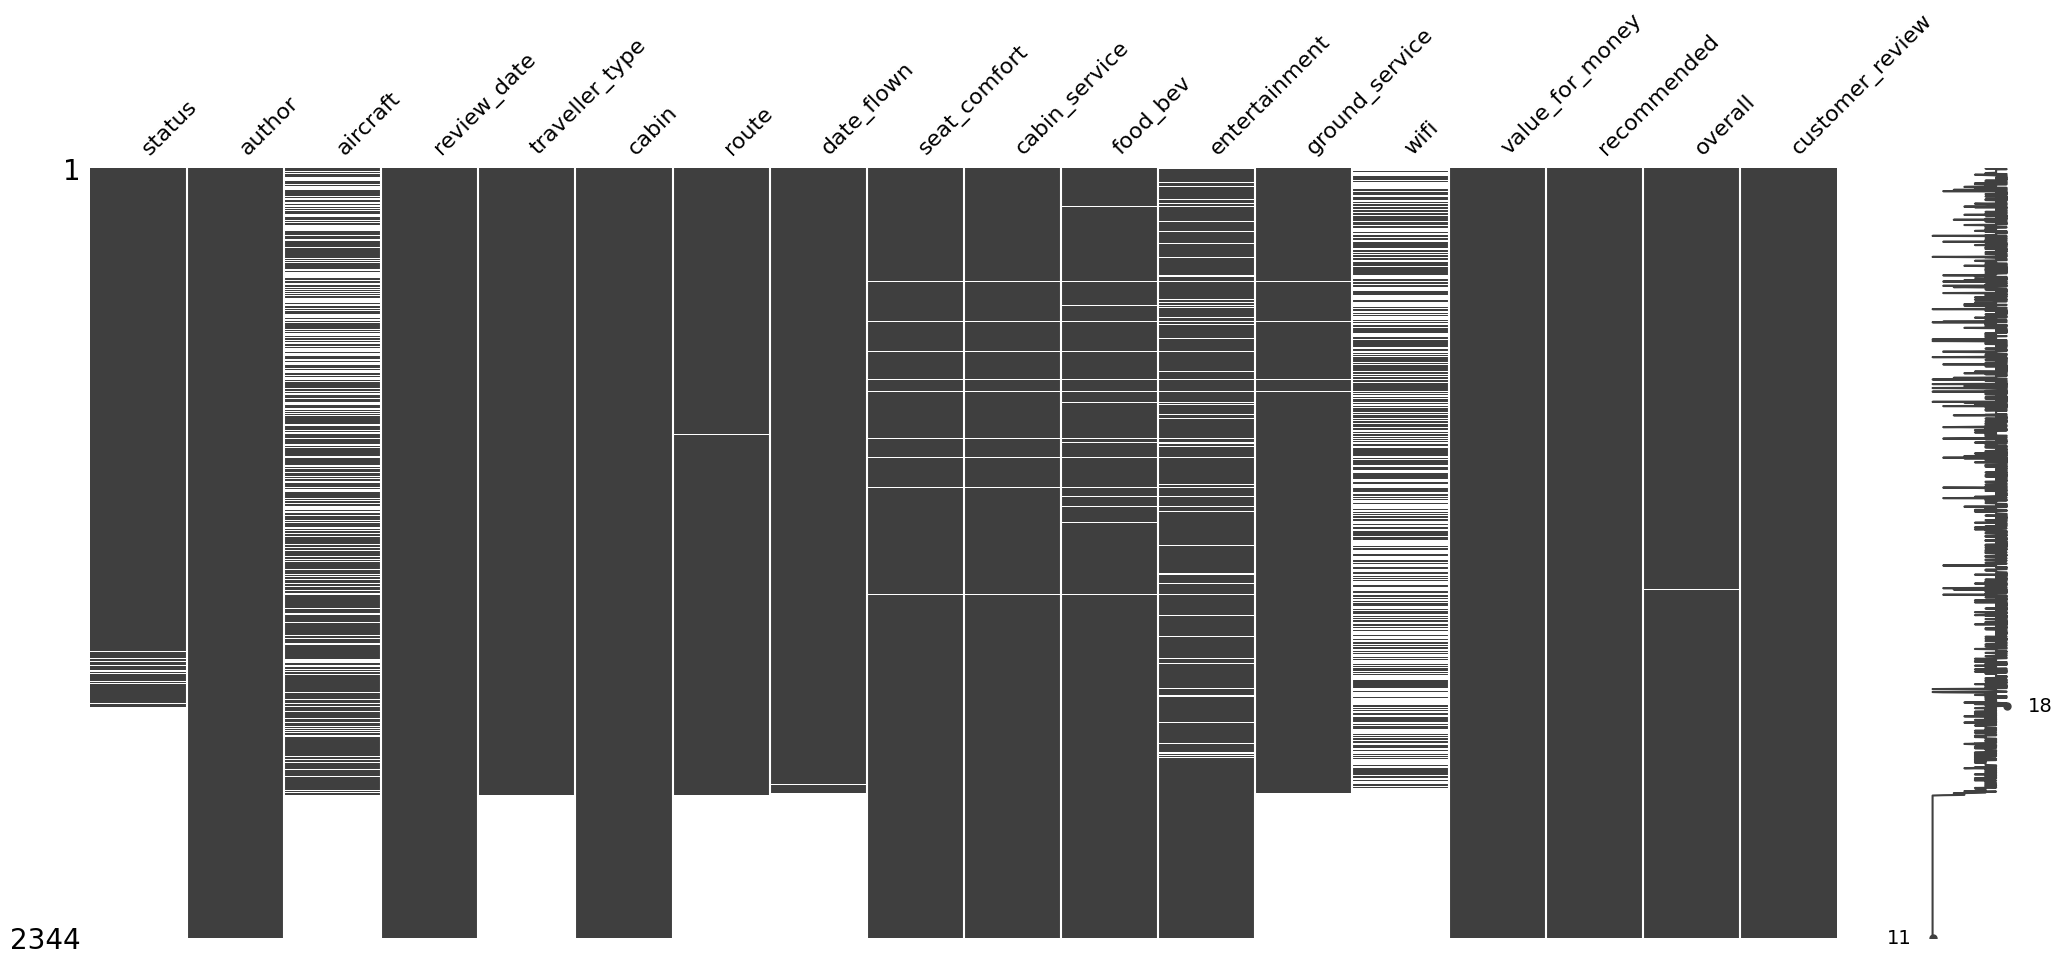

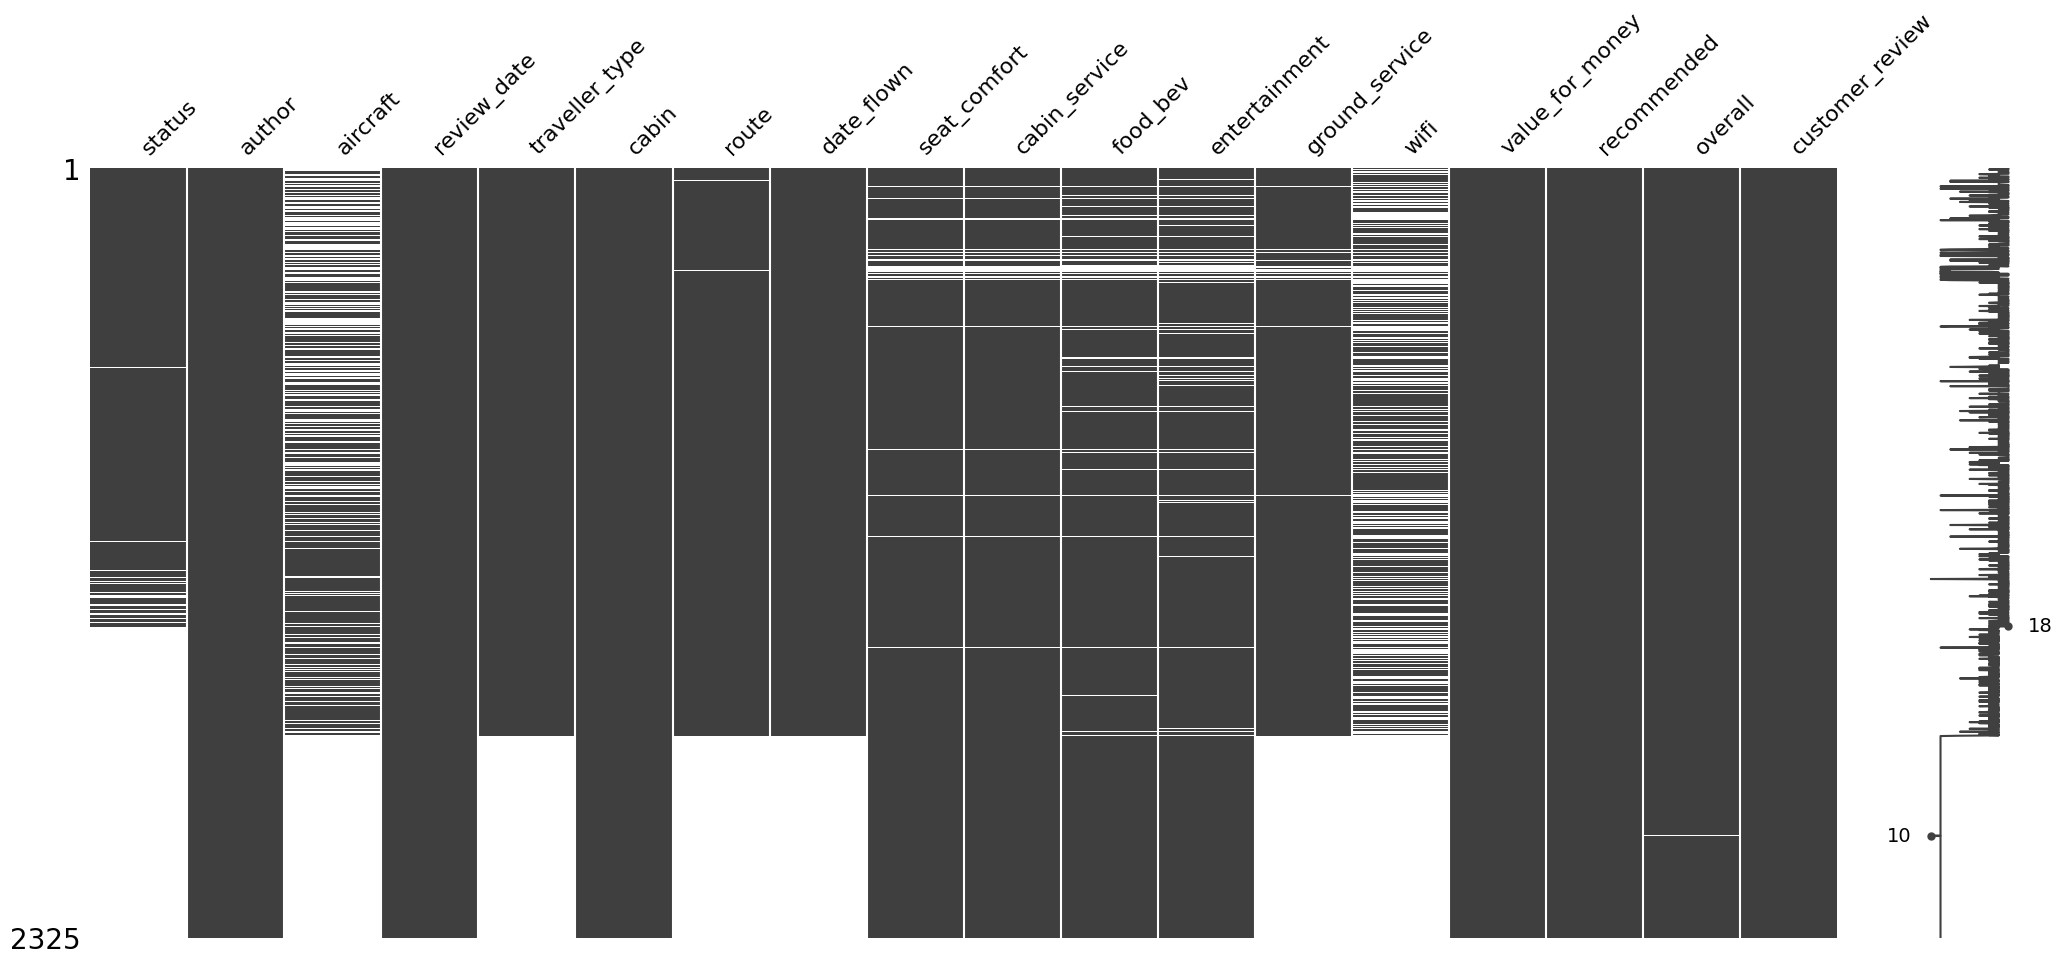

In [7]:
msno.matrix(etihad_airways)
msno.matrix(qatar_airways)
msno.matrix(emirates)

In [8]:
etihad_airways['airline'] ='etihad_airways'
qatar_airways['airline'] = 'qatar_airways'
emirates['airline'] = 'emirates'

In [9]:
merge_df = pd.concat([etihad_airways, qatar_airways,emirates])
merge_df

,status,author,aircraft,review_date,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,wifi,value_for_money,recommended,overall,customer_review,airline
0,✅ Trip Verified,\nS Farham,NaN,1st January 2024,Family Leisure,Economy Class,Doha to Kolkata via Abu Dhabi,December 2023,3.0,5.0,3.0,3.0,1.0,NaN,3,0,5.0,I want to express my thanks to the wonderfu...,etihad_airways
1,✅ Trip Verified,\nVishal Dham,NaN,30th December 2023,Solo Leisure,Economy Class,Ahmedabad to Toronto via Abu Dhabi,December 2023,NaN,NaN,NaN,NaN,1.0,NaN,1,0,1.0,Very rude ground staff of Etihad Airways at ...,etihad_airways
2,✅ Trip Verified,\n1 reviews\n\n\n\nN Madane,A320,28th December 2023,Business,Economy Class,Abu Dhabi to Jeddah,December 2023,2.0,2.0,2.0,NaN,1.0,2.0,2,0,2.0,Terrible unfortunate experience. Never encou...,etihad_airways
3,✅ Trip Verified,\nOmar Khan,A320 / A350-1000,25th December 2023,Business,Economy Class,Riyadh to Dublin via Abu Dhabi,November 2023,3.0,5.0,4.0,4.0,1.0,2.0,1,0,2.0,While the in-flight service on Etihad Airway...,etihad_airways
4,Not Verified,\nPaul Packham,A330,21st December 2023,Couple Leisure,Business Class,Jakarta to Abu Dhabi,October 2023,1.0,3.0,2.0,1.0,1.0,NaN,1,0,1.0,The worst business flight I had in 2023. Des...,etihad_airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,NaN,\nM Caplan,NaN,29th December 2013,NaN,Business Class,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,5,1,10.0,Flew 6 flights recently in business with Emira...,emirates
2321,NaN,\nRanaweera Ravindra,NaN,29th December 2013,NaN,Economy Class,NaN,NaN,4.0,1.0,2.0,5.0,NaN,NaN,3,0,2.0,The fleets are new comfy. Flew Narita-Dubai-Mu...,emirates
2322,NaN,\nJ Avramovic,NaN,29th December 2013,NaN,Economy Class,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,5,1,10.0,MUC-MCT via DXB and return. Travelled with my ...,emirates
2323,NaN,\nR Breakwell,NaN,25th December 2013,NaN,Economy Class,NaN,NaN,3.0,1.0,2.0,5.0,NaN,NaN,3,0,3.0,NBO-SIN-NBO. First leg was alright but nothing...,emirates


In [10]:
merge_df.describe().round(1)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,wifi,value_for_money,recommended,overall
count,6238.0,6235.0,6097.0,5905.0,4784.0,2589.0,6416.0,6416.0,6414.0
mean,3.4,3.4,3.3,3.7,3.1,3.0,3.3,0.5,5.7
std,1.4,1.5,1.5,1.3,1.6,1.5,1.5,0.5,3.4
min,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
25%,2.0,2.0,2.0,3.0,1.0,1.0,2.0,0.0,2.0
50%,4.0,4.0,4.0,4.0,3.0,3.0,4.0,1.0,6.0
75%,5.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0,9.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,10.0


Text(0.5, 1.0, 'Original Correlation Matrix')

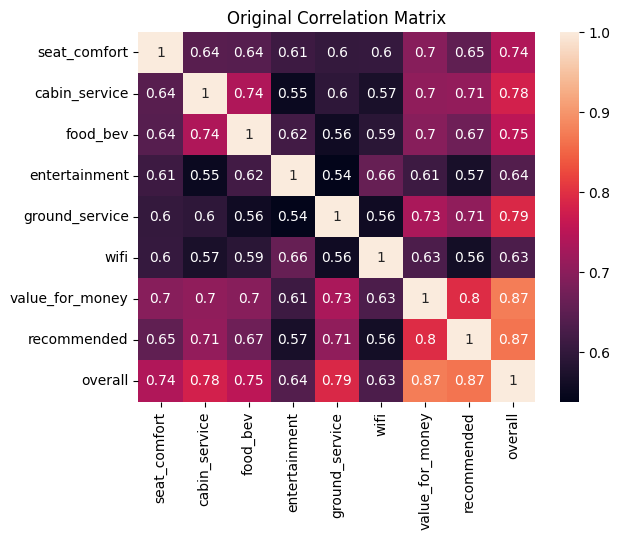

In [11]:
# 3 airlines corr
merge_df_rating = merge_df.iloc[:,8:17]
merge_df_rating['recommended'] = merge_df_rating['recommended'].replace({'yes': 1, 'no': 0})
sns.heatmap(merge_df_rating.corr(), annot=True)
plt.title('Original Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix with NaN Rows Removed')

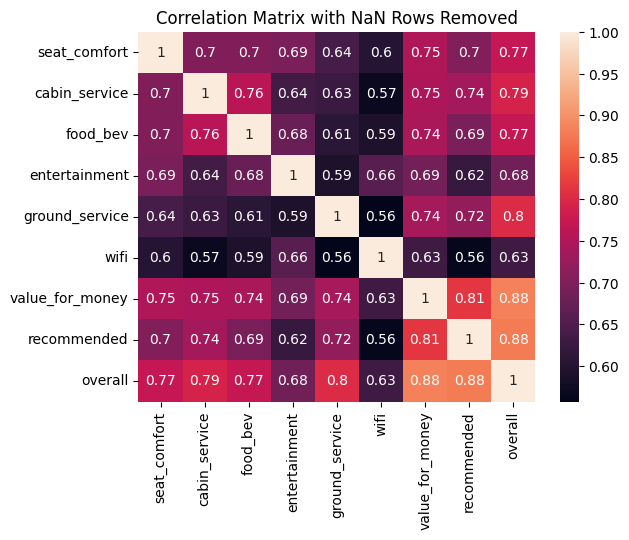

In [12]:
sns.heatmap(merge_df_rating.dropna().corr(), annot=True)
plt.title('Correlation Matrix with NaN Rows Removed')

Text(0.5, 1.0, 'Etihad Correlation Matrix')

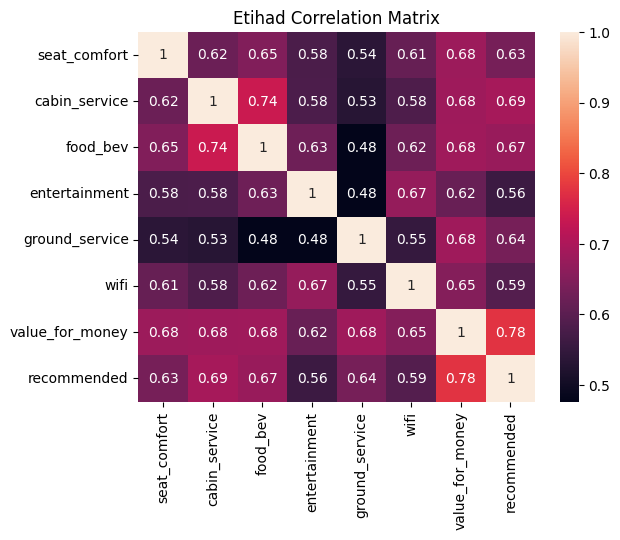

In [13]:
# etihad corr
etihad_airways_rating = etihad_airways.iloc[:,8:16]
etihad_airways_rating['recommended'] = etihad_airways_rating['recommended'].replace({'yes': 1, 'no': 0})
sns.heatmap(etihad_airways_rating.corr(), annot=True)
plt.title('Etihad Correlation Matrix')

### Sentiment Analysis

In [14]:
# # text preprocessing

# import pandas as pd
# import re
# import emoji
# from nltk.corpus import stopwords

# def text_preprocessing(text):
#     # Ensure that text is a Pandas Series
#     if not isinstance(text, pd.Series):
#         text = pd.Series(text)

#     stop_words = set(stopwords.words('english'))

#     result = text.str.lower()  # Lowercase text
#     result = result.str.replace('\d+', '', regex=True)  # Remove numbers
#     result = result.apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))  # Remove punctuations
#     result = result.str.strip()  # Remove whitespace
#     result = result.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))  # Remove stopwords
#     result = result.apply(lambda x: emoji.demojize(x))  # Remove emoji

#     return result

# etihad_airways['processed_review'] = etihad_airways.customer_review.apply(lambda x: text_preprocessing(x))
# etihad_airways

,status,author,aircraft,review_date,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,wifi,value_for_money,recommended,overall,customer_review,airline,processed_review
0,✅ Trip Verified,\nS Farham,NaN,1st January 2024,Family Leisure,Economy Class,Doha to Kolkata via Abu Dhabi,December 2023,3.0,5.0,3.0,3.0,1.0,NaN,3,0,5,I want to express my thanks to the wonderfu...,etihad_airways,want express thanks wonderful crew abu dhabi k...
1,✅ Trip Verified,\nVishal Dham,NaN,30th December 2023,Solo Leisure,Economy Class,Ahmedabad to Toronto via Abu Dhabi,December 2023,NaN,NaN,NaN,NaN,1.0,NaN,1,0,1,Very rude ground staff of Etihad Airways at ...,etihad_airways,rude ground staff etihad airways ahmedabad air...
2,✅ Trip Verified,\n1 reviews\n\n\n\nN Madane,A320,28th December 2023,Business,Economy Class,Abu Dhabi to Jeddah,December 2023,2.0,2.0,2.0,NaN,1.0,2.0,2,0,2,Terrible unfortunate experience. Never encou...,etihad_airways,terrible unfortunate experience never encounte...
3,✅ Trip Verified,\nOmar Khan,A320 / A350-1000,25th December 2023,Business,Economy Class,Riyadh to Dublin via Abu Dhabi,November 2023,3.0,5.0,4.0,4.0,1.0,2.0,1,0,2,While the in-flight service on Etihad Airway...,etihad_airways,inflight service etihad airways quite decent s...
4,Not Verified,\nPaul Packham,A330,21st December 2023,Couple Leisure,Business Class,Jakarta to Abu Dhabi,October 2023,1.0,3.0,2.0,1.0,1.0,NaN,1,0,1,The worst business flight I had in 2023. Des...,etihad_airways,worst business flight despite purchasing busin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,NaN,\nDavid Monteiro,NaN,5th August 2013,NaN,Business Class,NaN,NaN,5.0,4.0,4.0,5.0,NaN,NaN,4,1,9,Flew AUH-GVA A333. The Business class product ...,etihad_airways,flew auhgva business class product good consis...
1743,NaN,\nV Saxena,NaN,5th August 2013,NaN,Economy Class,NaN,NaN,2.0,2.0,3.0,2.0,NaN,NaN,2,0,2,March 2013 MAN-AUH-DEL in Economy Class. While...,etihad_airways,march manauhdel economy class manchester airpo...
1744,NaN,\nS Nkavoyannis,NaN,4th August 2013,NaN,First Class,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,5,1,8,For some reason First Class is not always avai...,etihad_airways,reason first class always available abu dhabi ...
1745,NaN,\nColin Walsh,NaN,1st August 2013,NaN,Economy Class,NaN,NaN,3.0,1.0,2.0,3.0,NaN,NaN,3,0,2,Very disappointing flight (DUB-AUH-SYD) recent...,etihad_airways,disappointing flight dubauhsyd recently etihad...


In [15]:
# !pip3 install -U spacy
# !python3 -m spacy download en_core_web_sm

In [17]:
# def remove_frequent_words(text):
#     frequent_words = ['etihad', 'airways', 'abu', 'dhabi', 'emirate', 'dubai', 'fly', 'flight', 'airline']
#     result = ' '.join([word for word in text.split() if word not in frequent_words])
    
#     return result

# etihad_airways['final_review'] = etihad_airways.lemmatized_review.apply(remove_frequent_words)

In [18]:
# # TextBlob
 
# def get_sentiment(text):
#     sentiment = TextBlob(text).sentiment.polarity
#     if sentiment > 0:
#         return 'Positive'
#     elif sentiment == 0:
#         return 'Neutral'
#     else:
#          return 'Negative'

# etihad_airways['textblob_sentiment'] = etihad_airways['lemmatized_review'].apply(get_sentiment)
# etihad_airways.textblob_sentiment.value_counts()

textblob_sentiment
Positive    1023
Negative     706
Neutral       18
Name: count, dtype: int64

In [19]:
# # accuracy
# etihad_airways = etihad_airways[etihad_airways['textblob_sentiment'] != 'Neutral']
# etihad_airways['y_test'] = etihad_airways['recommended'].map({'yes': 1, 'no': 0})
# etihad_airways['y_pred'] = etihad_airways['textblob_sentiment'].map({'Positive': 1, 'Negative': 0})
# TextBlob_accuracy = accuracy_score(etihad_airways['y_test'], etihad_airways['y_pred'])
# TextBlob_accuracy

In [21]:
# # bert 

# import torch
# from torch.nn.functional import softmax
# from transformers import BertTokenizer, BertForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification

# tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

# bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
# def bert_classification(text):
#     inputs = bert_tokenizer(text, return_tensors="pt")
#     with torch.no_grad():
#         logits = bert_model(**inputs).logits
#     predicted_class_id = logits.argmax().item()
    
#     return "Positive" if predicted_class_id == 1 else "Negative"

# etihad_airways['bert_sentiment'] = etihad_airways.lemmatized_review.apply(bert_classification)
# etihad_airways.bert_sentiment.value_counts()

bert_sentiment
Positive    1747
Name: count, dtype: int64